# データの読み込み

In [1]:
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skorch
import pandas as pd
import sklearn
import csv
import os

In [2]:
DATA_FOLDER = '/home/tamaru/scene_categorize/main/data'
csv_path = os.path.join(DATA_FOLDER, 'cube_data.csv')
cube = pd.read_csv(os.path.join(DATA_FOLDER, 'cube_data.csv'), names=["img_path", "l_class", 's_class'])
light = pd.read_csv(os.path.join(DATA_FOLDER, 'light.csv'),names=["img_path", "l_class", 's_class'])

In [6]:
datalist = pd.concat([cube,light],axis=0)
datalist

,img_path,l_class,s_class
0,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan,1
1,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan,1
2,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan,1
3,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan,1
4,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan,1
5,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan,1
6,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan,1
7,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan,1
8,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan,1
9,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan,1


In [7]:
dfl = datalist.drop(['s_class'], axis=1)
dfl.head()

,img_path,l_class
0,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan
1,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan
2,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan
3,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan
4,/home/tamaru/scene_categorize/main/data/insta_...,5gokan-denkisogokan


In [8]:
dfl.groupby('l_class').count()

,img_path
l_class,
4gokan_inside,720
4gokan_outside,2976
5gokan-denkisogokan,4332
5gokan-mediacenter,1524
5gokan_1F,780
5gokan_2F,1152
5gokan_3F,384
5gokan_ent_east,1620
5gokan_lounge,4332


In [9]:
num_dfl_class = len(dfl.l_class.unique())
num_dfl_class

34

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder() 
le.fit(dfl.l_class) 
dfl["labels"] = le.transform(dfl.l_class) 
dfl.groupby('labels')

In [12]:
cor_table = dfl.groupby('labels').l_class.unique() 
cor_table = pd.DataFrame(cor_table) 
cor_table

,l_class
labels,
0,[4gokan_inside]
1,[4gokan_outside]
2,[5gokan-denkisogokan]
3,[5gokan-mediacenter]
4,[5gokan_1F]
5,[5gokan_2F]
6,[5gokan_3F]
7,[5gokan_ent_east]
8,[5gokan_lounge]


In [13]:
dfl = dfl.drop(['l_class'], axis=1)
dfl

,img_path,labels
0,/home/tamaru/scene_categorize/main/data/insta_...,2
1,/home/tamaru/scene_categorize/main/data/insta_...,2
2,/home/tamaru/scene_categorize/main/data/insta_...,2
3,/home/tamaru/scene_categorize/main/data/insta_...,2
4,/home/tamaru/scene_categorize/main/data/insta_...,2
5,/home/tamaru/scene_categorize/main/data/insta_...,2
6,/home/tamaru/scene_categorize/main/data/insta_...,2
7,/home/tamaru/scene_categorize/main/data/insta_...,2
8,/home/tamaru/scene_categorize/main/data/insta_...,2
9,/home/tamaru/scene_categorize/main/data/insta_...,2


# trainデータ, testデータの分割

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_data, test_data = train_test_split(dfl, test_size=0.2, random_state=42, stratify=dfl.labels)

In [16]:
#画像の前処理を定義
data_transforms = {
    'data': transforms.Compose([
        transforms.Resize(224), #いらない
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
}
#正規化をしない処理
to_tensor_transforms = transforms.Compose([
    transforms.Resize(224), #いらない
    transforms.ToTensor()
])

In [17]:
class CustomDataset(torch.utils.data.Dataset):
        
    def __init__(self, dataframe, root_dir, transform=None):
        #前処理クラスの指定
        self.transform = transform
        #pandasでcsvデータの読み出し
        #画像とラベルの一覧を保持するリスト
        self.images = np.array(dataframe.img_path).tolist()
        self.labels = np.array(dataframe.labels).tolist()
        self.root_dir = root_dir
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        #dataframeから画像へのパスとラベルを読み出す
        label = self.labels[idx]
        img = self.images[idx]
        #画像の読み込み
        with open(img, 'rb') as f:
            image = Image.open(f)
            image = image.convert('RGB')
            image = image.resize((224,224))
        #画像への処理
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [18]:
train_set = CustomDataset(dataframe=train_data, root_dir="../data/insta_cube", transform=data_transforms['data'])
test_set = CustomDataset(dataframe=test_data, root_dir="../data/insta_cube", transform=data_transforms['data'])

In [19]:
# DataLoaderのcollate_fnはバッチ内のtensorのshapeをすべて同じにする必要がある
# 自分で指定してエラーが起きないようにする
def my_collate_fn(batch):
    # datasetの出力が
    # [image, target] = dataset[batch_idx]
    # の場合.
    images = []
    labels = []
    for image, label in batch:
        images.append(image)
        labels.append(label)
    images = torch.stack(images,dim=0)
    return images, labels

In [20]:
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=16, shuffle=True, num_workers=6)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=16, shuffle=False, num_workers=6)

# ネットワークの定義
vgg16 finetuning

In [21]:
import torchvision.models as models

In [22]:
num_classes = num_dfl_class
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = models.vgg16(pretrained=True, progress=True)

In [23]:
#パラメータ凍結と採取層クラス数変更
for param in net.parameters():
    param.requires_grad = False
#最終層をnum_s_classクラス用に変更
num_ftrs = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features=num_ftrs, out_features=num_classes).to(device)
#最適化関数
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.classifier[6].parameters())
net = net.to(device)
net

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

#学習率の変更
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=)

# 学習の実行

In [24]:
#Cross Validationを行いたい...
#Early Stopping を行いたい

num_epochs = 10
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
    
    #train
    net.train()
    for i, (images, labels) in enumerate(train_loader):
        #view()での変換をしない
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        train_acc += (outputs.max(1)[1]==labels).sum().item()
        loss.backward()
        optimizer.step()
        
    avg_train_loss = train_loss/len(train_loader.dataset)
    avg_train_acc = train_acc/len(train_loader.dataset)
    
    #val
    net.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            #view()での変換をしない
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1]==labels).sum().item()
   
    avg_val_loss = val_loss/len(test_loader.dataset)
    avg_val_acc = val_acc/len(test_loader.dataset)
    
    print('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}'.format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

Epoch [1/10], Loss: 0.0713, val_loss: 0.0351, val_acc: 0.8289
Epoch [2/10], Loss: 0.0553, val_loss: 0.0262, val_acc: 0.8686
Epoch [3/10], Loss: 0.0532, val_loss: 0.0247, val_acc: 0.8789
Epoch [4/10], Loss: 0.0523, val_loss: 0.0217, val_acc: 0.8902
Epoch [5/10], Loss: 0.0530, val_loss: 0.0212, val_acc: 0.8993
Epoch [6/10], Loss: 0.0522, val_loss: 0.0194, val_acc: 0.9025
Epoch [7/10], Loss: 0.0526, val_loss: 0.0194, val_acc: 0.9012
Epoch [8/10], Loss: 0.0516, val_loss: 0.0179, val_acc: 0.9122
Epoch [9/10], Loss: 0.0530, val_loss: 0.0179, val_acc: 0.9090
Epoch [10/10], Loss: 0.0518, val_loss: 0.0179, val_acc: 0.9137


# train, validationのloss acc のグラフを作成

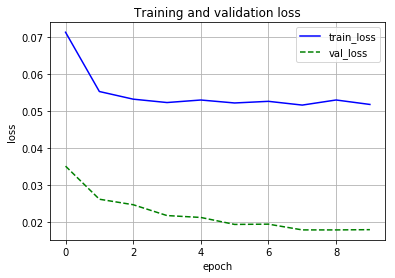

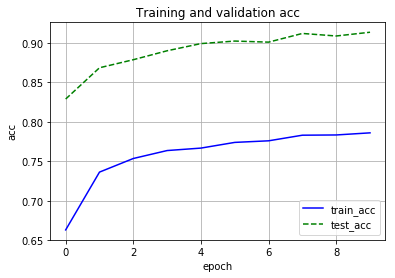

In [25]:
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()

plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='test_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation acc')
plt.grid()

# Grad-CAMの定義

In [26]:
class GradCam:
    def __init__(self, model):
        self.model = model.eval()
        self.feature = None
        self.gradient = None
    
    def save_gradient(self, grad):
        self.gradient = grad
    
    def __call__(self, x):
        image_size = (x.size(-1), x.size(-2))
        feature_maps =[]
        
        for i in range(x.size(0)):
            img = x[i].data.cpu().numpy() #GPU上のTensorはcpuに移さないとnumpyに変換できない
            img = img - np.min(img)
            if np.max(img) != 0:
                img = img / np.max(img)
            
            feature = x[i].unsqueeze(0)
            
            for name, module in self.model.named_children():
                if name == 'clasifier':
                    feature = feature.view(feature.size(0), -1)
                feature = module(feature)
                if name == 'features':
                    feature.register_hook(self.save_gradient)
                    self.feature = feature
                    
            classes = F.sigmoid(feature)
            one_hot, _ = classes.max(dim=-1)
            self.model.zero_grad()
            one_hot.backward()
            
            weight = self.gradient.mean(dim=-1, keepdim=True).mean(dim=-2, keepdim=True)
            
            mask = F.relu((weight*self.feature).sum(dim=1)).squeeze(0)
            mask = cv2.resize(mask.data.cpu().numpy(), image_size)
            mask = mask - np.min(mask)
            
            if np.max(mask) != 0:
                mask = mask/np.max(mask)
                
            feature_map = np.float32(cv2.applyColorMap(np.uint8(255*mask), cv2.COLORMAP_JET))
            cam = feature_map + np.float32((np.uint8(img.transpose((1,2,0))*225)))
            cam = cam - np.min(cam)
            
            if np.max(cam) != 0:
                cam = cam/np.max(cam)
                
            feature_maps.append(transforms.ToTensor()(cv2.cvtColor(np.uint8(225*cam), cv2.COLOR_BGR2RGB)))
            
        feature_maps = torch.stack(feature_maps)
        
        return feature_maps
                

In [27]:
for i in range(len(cam_test_img_path)):
    #入力画像の読み込み
    cam_test_img = Image.open(cam_test_img_path[i])
    cam_img_tensor = (data_transforms['data']((cam_test_img))).unsqueeze(dim=0)
    
    cam_img_tensor = cam_img_tensor.to(device)
    
    img_size = cam_test_img.size
    #grad-camによる予測根拠可視化
    gradcam = GradCam(net)
    
    feature_image = gradcam(cam_img_tensor).squeeze(dim=0)
    feature_image = transforms.ToPILImage()(feature_image)
    
    pred_idx = net(cam_img_tensor).max(1)[1]
                      
    save_dir = '../data/gradcam_img/VGG16/'+s_classlist[i]
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)	# Make a directory
    #保存先ディレクトリ名はその画像のクラス，画像の予測値を画像の名前に書き込む
    cv2.imwrite(save_dir+'/heatmap_pred_'+s_classlist[pred_idx]+'.jpg', superimposed_img)
    print('Saved: ', save_dir+'/heatmap_pred_'+s_classlist[pred_idx]+'.jpg')

NameError: name 'cam_test_img_path' is not defined